In [31]:
library(lattice)
library(Stat2Data)
library(agricolae)
data(NCbirths)

nc = NCbirths

In [32]:
head(nc)
attach(nc)

ID,Plural,Sex,MomAge,Weeks,Marital,RaceMom,HispMom,Gained,Smoke,BirthWeightOz,BirthWeightGm,Low,Premie,MomRace
1,1,1,32,40,1,1,N,38,0,111,3146.85,0,0,white
2,1,2,32,37,1,1,N,34,0,116,3288.60,0,0,white
3,1,1,27,39,1,1,N,12,0,138,3912.30,0,0,white
4,1,1,27,39,1,1,N,15,0,136,3855.60,0,0,white
5,1,1,25,39,1,1,N,32,0,121,3430.35,0,0,white
6,1,1,28,43,1,1,N,32,0,117,3316.95,0,0,white


The following objects are masked from nc (pos = 4):

    BirthWeightGm, BirthWeightOz, Gained, HispMom, ID, Low, Marital,
    MomAge, MomRace, Plural, Premie, RaceMom, Sex, Smoke, Weeks



In [33]:
unique(MomRace)

[1] white    hispanic black    other   
Levels: black hispanic other white

# 1a

In [34]:
birthWeightMomRaceLm = lm(BirthWeightOz ~ MomRace)
lmAnova = anova(birthWeightMomRaceLm)
lmAnova

,Df,Sum Sq,Mean Sq,F value,Pr(>F)
MomRace,3,14002.37,4667.458,9.528224,3.118173e-06
Residuals,1446,708331.74,489.856,NA,NA


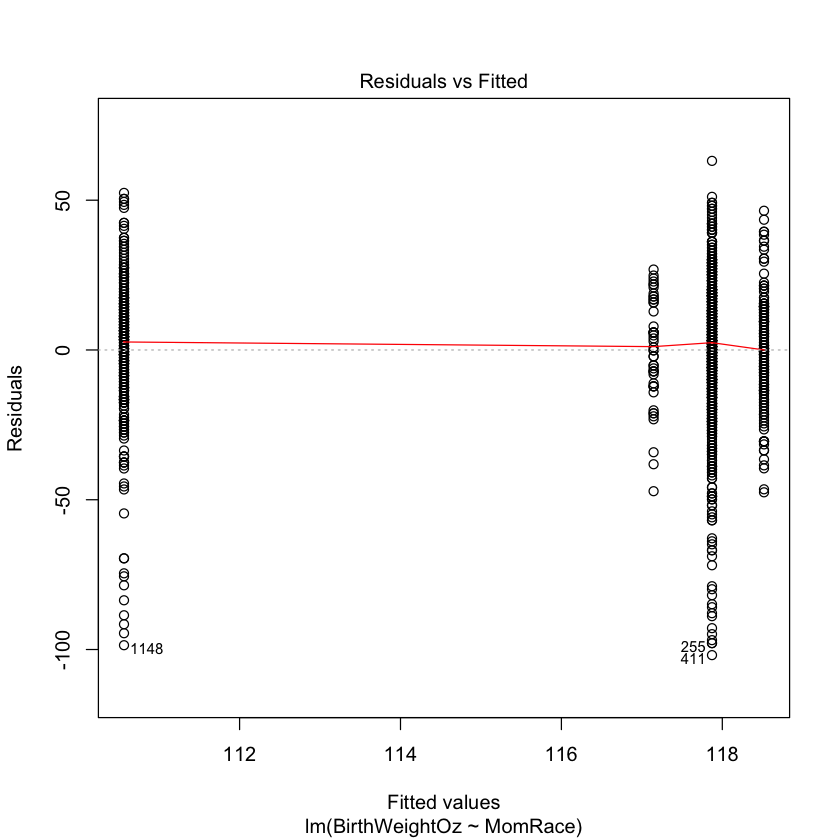

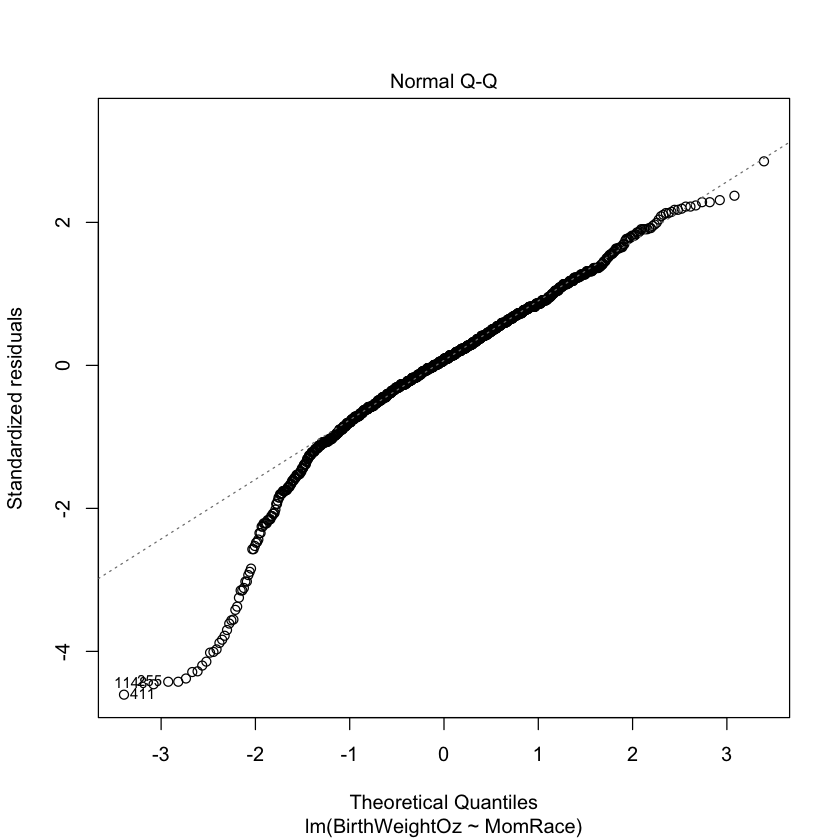

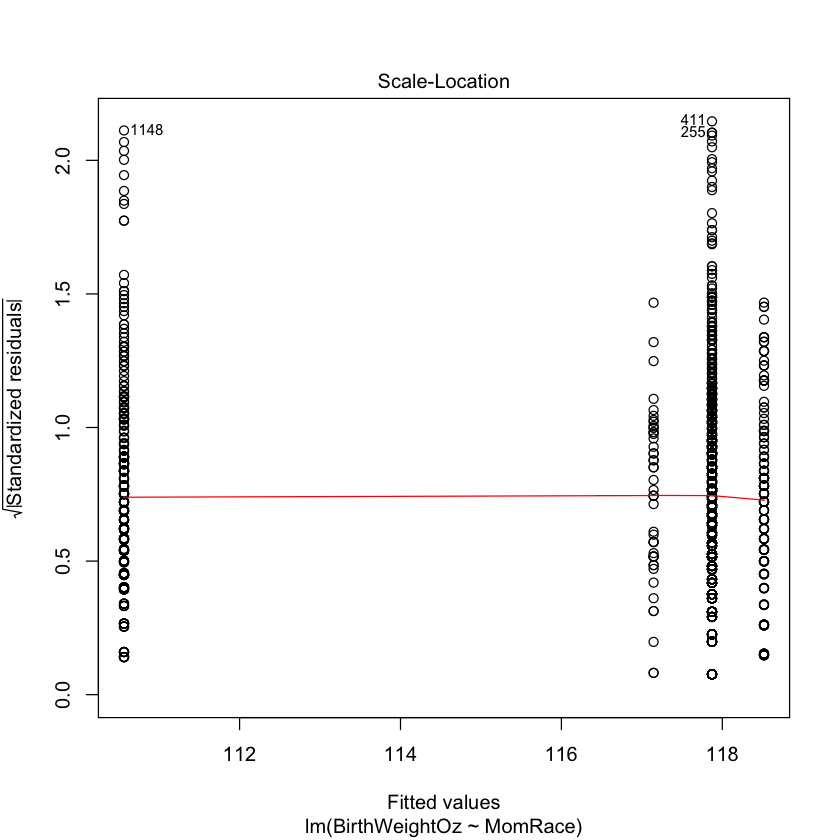

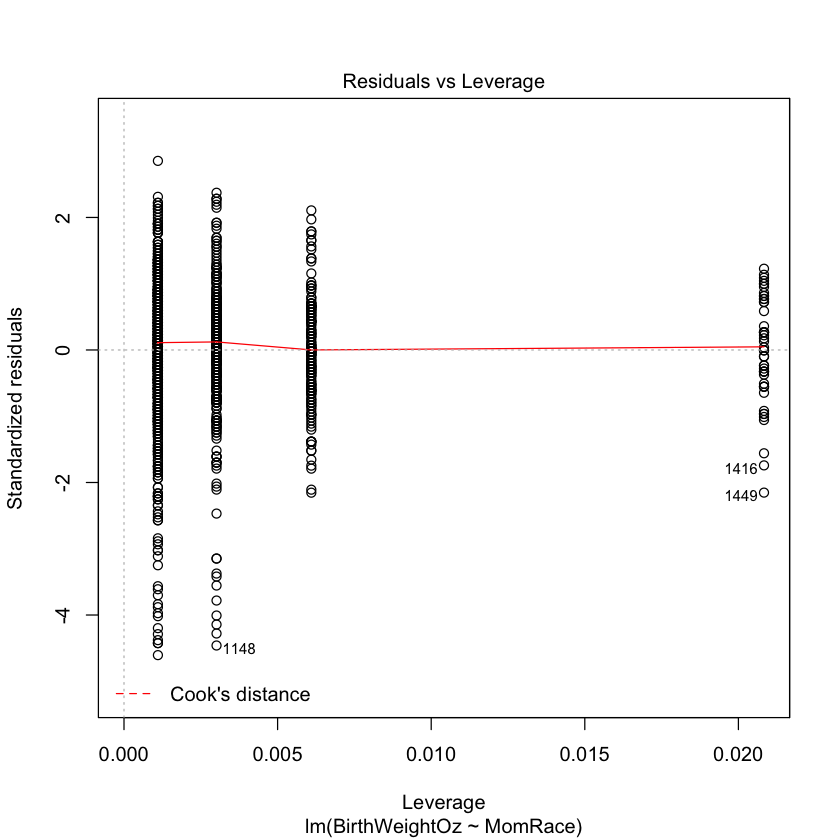

In [35]:
plot(birthWeightMomRaceLm)

### From the plots above, we can see that the model deviates significantly from the theoretical quantiles, indicating nonnormality. Therefore, we can not make confident inferences from this model. However, the model suggests that there is a real difference between the birth weights depending on the mother's race. 

## 1b - Fisher's LSD 

In [57]:
# We have a significant F test 
lmAnova
print(LSD.test(BirthWeightOz, MomRace, 1446, 489.856, group=FALSE))

,Df,Sum Sq,Mean Sq,F value,Pr(>F)
MomRace,3,14002.37,4667.458,9.528224,3.118173e-06
Residuals,1446,708331.74,489.856,NA,NA


$statistics
  MSerror   Df     Mean       CV
  489.856 1446 116.2476 19.03927

$parameters
        test p.ajusted  name.t ntr alpha
  Fisher-LSD      none MomRace   4  0.05

$means
         BirthWeightOz      std   r      LCL      UCL Min Max    Q25   Q50
black         110.5633 23.39557 332 108.1805 112.9460  12 163 100.00 114.0
hispanic      118.5183 18.16876 164 115.1281 121.9085  71 165 106.75 118.0
other         117.1458 17.59593  48 110.8793 123.4123  70 144 105.75 117.5
white         117.8720 22.51578 906 116.4296 119.3144  16 181 108.00 120.0
            Q75
black    124.00
hispanic 131.00
other    133.25
white    132.00

$comparison
                 difference pvalue signif.        LCL        UCL
black - hispanic -7.9550397 0.0002     *** -12.098812 -3.8112677
black - other    -6.5825803 0.0543       . -13.286798  0.1216375
black - white    -7.3087117 0.0000     *** -10.094019 -4.5234041
hispanic - other  1.3724593 0.7056          -5.752319  8.4972378
hispanic - white  0.646328

### According to Fisher's LSD, we have a significant difference between the birth weight of babies with a mother of black and hispanic race and black and white race. 

## 1c - Bonferroni

In [17]:
pairwise.t.test(BirthWeightOz, MomRace, p.adj = 'bonferroni')


	Pairwise comparisons using t tests with pooled SD 

data:  BirthWeightOz and MomRace 

         black   hispanic other
hispanic 0.001   -        -    
other    0.326   1.000    -    
white    1.8e-06 1.000    1.000

P value adjustment method: bonferroni 

### While Bonferroni is more conservative than Fisher's LSD, the two agrees in this case. (black vs hispanic and black vs white baby weights are significantly different)

## 1d - Tukey's HSD

In [29]:
TukeyHSD(aov(BirthWeightOz ~ MomRace))

  Tukey multiple comparisons of means
    95% family-wise confidence level

Fit: aov(formula = BirthWeightOz ~ MomRace)

$MomRace
                     diff        lwr       upr     p adj
hispanic-black  7.9550397   2.521803 13.388276 0.0009910
other-black     6.5825803  -2.207865 15.373026 0.2175230
white-black     7.3087117   3.656668 10.960755 0.0000018
other-hispanic -1.3724593 -10.714336  7.969418 0.9816184
white-hispanic -0.6463280  -5.477079  4.184423 0.9859901
white-other     0.7261313  -7.705240  9.157503 0.9961655


### Tukey's HSD is generally somewhere in between Bonferroni's and Fisher's LSD's assessment. In this case, it agrees with both methods (as you would expect since the other two methods agree). Therefore, we can be pretty confident that there is a significant difference between the previously mentioned groups. Interestingly, just as one example in this data, we can see that in the black-other case, Fisher's LSD < Tukey's HSD < Bonferroni, which is what we would also generally expect. Also, bonferroni has very high p-values (1) for the comparisons in which we would not reject the null for Fisher's LSD and Tukey's HSD, which again is what we would expect since it is more conservative. 

## 2 - Does spinal misalignment lead to infertility?

#### It seems that there is at least some evidence that chiropractic help can increase the likelyhood of fertility and achieving pregnancy. I search the research question has stated above on Google and found an article http://americanpregnancy.org/infertility/infertility-and-chiropractic-care/ that stated fertility issues are associated with improper nervous system function. Since this is no research paper, I continued my search and found another article http://icpa4kids.org/Chiropractic-Research/the-chiropractic-approach-to-infertility-a-review-of-recent-chiropractic-research/All-Pages.html. It states that normal nerve function is essential for good health, and that chiropractors make corrections that allow for a properly functioning nervous system. The fifth annotation from this article provided more insight quoting this study: https://www.vertebralsubluxationresearch.com/2017/09/06/healthy-pregnancy-in-a-previously-infertile-patient-following-d-n-f-t-chiropractic-care-a-case-report/. The study states essentially that a women was unable to become pregnant via in vitro fertalization and then 3 weeks later sought chiropractic care. She was fund to have significant muscle asymmetry, which has soon corrected. About 2 months later, the women successfully became pregnant via in vitro fertilization. This is a very small sample size (exactly 1) with potentially numerous factors (the linked page does not give details on how they controlled the case study) at work, but it does suggest that chiropractic help can lead to a higher chance of becoming pregnant. The sixth footnote of the same icpa4kis article directs us to another case study (found here: https://www.vertebralsubluxationresearch.com/2017/09/06/female-infertility-and-chiropractic-wellness-care-a-case-study-on-the-autonomic-nervous-system-response-while-under-subluxation-based-chiropractic-care-and-subsequent-fertility/) of a women who was unable to become pregnant and only became pregnant after receiving nine months of chiropractic care. There are several other case studies quoted in that same article, each of which suggesting the effectiveness of chiropractic care in increasing the likelihood of becoming pregnant. 